In [22]:
import pandas as pd
import numpy as np

In [23]:
# 데이터 준비
file_name='fish.csv'
df=pd.read_csv(file_name)
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [24]:
# 데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [25]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [26]:
# 결측치 확인
df.isna().sum() 

Species     0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

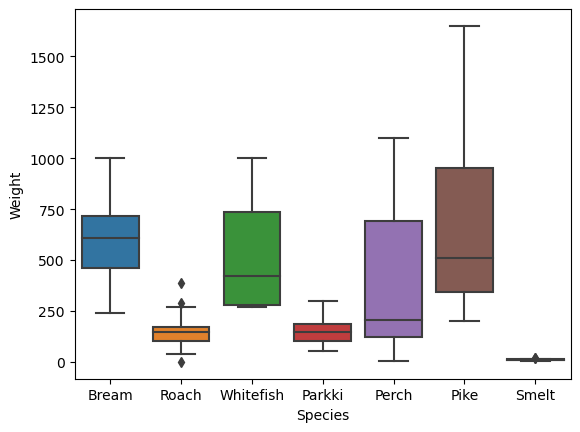

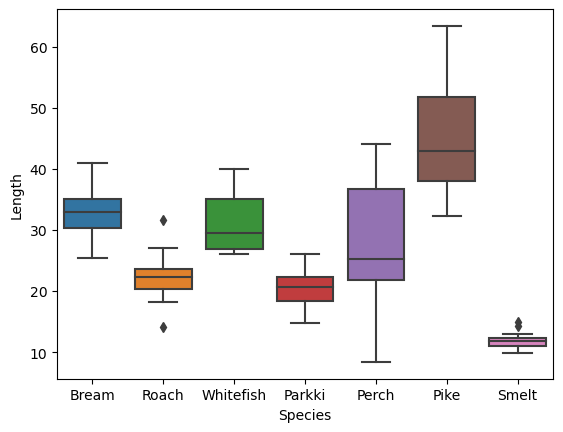

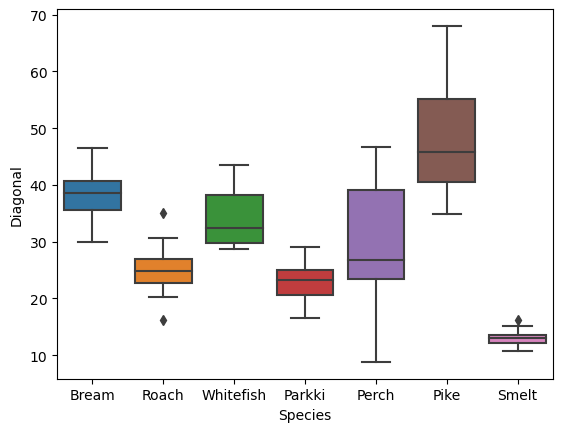

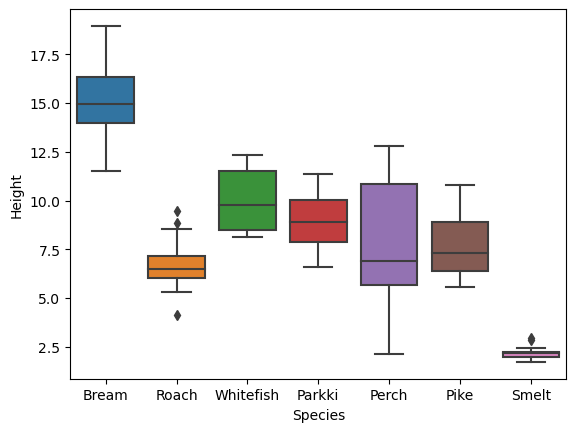

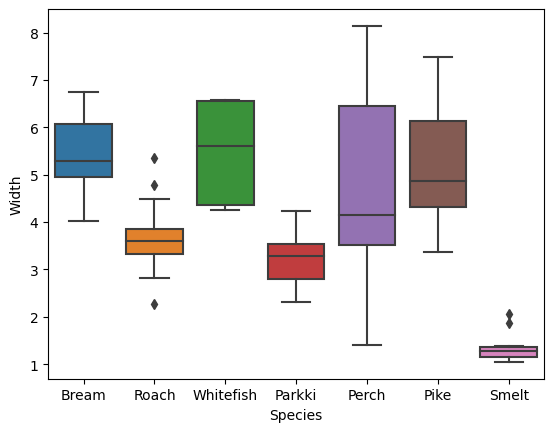

In [27]:
# 이상값 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Species', y='Weight', data=df)
plt.show()
sns.boxplot(x='Species', y='Length', data=df)
plt.show()
sns.boxplot(x='Species', y='Diagonal', data=df)
plt.show()
sns.boxplot(x='Species', y='Height', data=df)
plt.show()
sns.boxplot(x='Species', y='Width', data=df)
plt.show()

# 아래 데이터를 보면 Roach와 Smelt 종에만 이상값이 있는 것을 볼 수 있다.

In [28]:
# 이상치 제거하기 위해서 roach만 따로 뽑았다
mask_roach=(df['Species']=='Roach')
df_roach=df[mask_roach]
df_roach

,Species,Weight,Length,Diagonal,Height,Width
35,Roach,40.0,14.1,16.2,4.1472,2.2680
36,Roach,69.0,18.2,20.3,5.2983,2.8217
37,Roach,78.0,18.8,21.2,5.5756,2.9044
38,Roach,87.0,19.8,22.2,5.6166,3.1746
39,Roach,120.0,20.0,22.2,6.2160,3.5742
40,Roach,0.0,20.5,22.8,6.4752,3.3516
41,Roach,110.0,20.8,23.1,6.1677,3.3957
42,Roach,120.0,21.0,23.7,6.1146,3.2943
43,Roach,150.0,22.0,24.7,5.8045,3.7544
44,Roach,145.0,22.0,24.3,6.6339,3.5478


In [29]:
def detect_outliers(df,columns):
    q1=df[columns].quantile(0.25)
    q3=df[columns].quantile(0.75)
    iqr=q3-q1

    boundary=1.5*iqr
    
    index1=df[df[columns] > q3+boundary].index
    index2=df[df[columns] < q1-boundary].index 
    
    df[columns]=df[columns].drop(index1)
    df[columns]=df[columns].drop(index2)

    df.dropna(inplace=True)

    return df


In [30]:
# 도미랑 빙어의 무게랑 길이만 추출
mask_bs=(df.iloc[:,0]=='Bream' )| (df.iloc[:,0]=='Smelt')
df_bs=pd.DataFrame(df[mask_bs].iloc[:,0:3])
df_bs

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [31]:
# 특성/피쳐만 추출
data_bs=df_bs[df_bs.columns[1:]]
target_bs=df_bs['Species']
print(data_bs.shape, target_bs.shape)
data_bs

(49, 2) (49,)


,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0
5,450.0,29.7
6,500.0,29.7
7,390.0,30.0
8,450.0,30.0
9,500.0,30.7


In [32]:
target_bs

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
5      Bream
6      Bream
7      Bream
8      Bream
9      Bream
10     Bream
11     Bream
12     Bream
13     Bream
14     Bream
15     Bream
16     Bream
17     Bream
18     Bream
19     Bream
20     Bream
21     Bream
22     Bream
23     Bream
24     Bream
25     Bream
26     Bream
27     Bream
28     Bream
29     Bream
30     Bream
31     Bream
32     Bream
33     Bream
34     Bream
145    Smelt
146    Smelt
147    Smelt
148    Smelt
149    Smelt
150    Smelt
151    Smelt
152    Smelt
153    Smelt
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, dtype: object

In [33]:
# 훈련데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split

# 비율조절 => test_size= 실수값 or train_size=실수값 , 80:20
# 타겟의 분류 비율에 맞추어서 분리 원함 ==> stratify 설정 - 중요!!!!
# 매번 동일한 랜덤 데이터로 분리 되도록 설정 => random_state : seed의미
train_x, test_x, train_y, test_y = train_test_split(data_bs, target_bs,
                                                    stratify=target_bs,test_size=0.25,
                                                    random_state=10)
f'훈련데이터 : {train_x.shape} 테스트 데이터 : {test_x.shape}'

'훈련데이터 : (36, 2) 테스트 데이터 : (13, 2)'

In [34]:
# 정규화
from sklearn.preprocessing import StandardScaler
# (1) 스케일러 객체 생성
scaler=StandardScaler()
# (2) 학습특성 데이터 전달 => 스케일링 할 데이터 분석
scaler.fit(train_x)
scaler.fit(test_x)
# (3) 학습특성 데이터 스케일링을 변환
train_x_scaled=scaler.transform(train_x)
test_x_scaled=scaler.transform(test_x)

In [35]:
train_x_scaled=pd.DataFrame(train_x_scaled,columns=train_x.columns)
train_x_scaled


,Weight,Length
0,-1.339368,-1.665387
1,-0.217377,0.313485
2,1.568206,0.999232
3,-1.319756,-1.410680
4,-0.510096,-0.048982
5,1.348667,1.244142
6,-1.338490,-1.587015
7,-1.333514,-1.518441
8,-1.330294,-1.528237
9,-0.041746,0.313485


In [36]:
train_y.reset_index(drop=True,inplace=True)
train_y

0     Smelt
1     Bream
2     Bream
3     Smelt
4     Bream
5     Bream
6     Smelt
7     Smelt
8     Smelt
9     Bream
10    Bream
11    Bream
12    Bream
13    Bream
14    Smelt
15    Bream
16    Smelt
17    Bream
18    Bream
19    Bream
20    Bream
21    Bream
22    Bream
23    Smelt
24    Smelt
25    Bream
26    Bream
27    Bream
28    Smelt
29    Bream
30    Bream
31    Bream
32    Bream
33    Bream
34    Bream
35    Bream
Name: Species, dtype: object

In [37]:
test_x_scaled=pd.DataFrame(test_x_scaled,columns=test_x.columns)
test_x_scaled

,Weight,Length
0,0.690050,0.607376
1,-1.323268,-1.430273
2,1.129128,0.901268
3,0.104613,0.382059
4,0.763230,0.803304
5,-1.329708,-1.469459
6,0.731031,0.901268
7,0.397332,0.509412
8,0.690050,0.607376
9,-1.337026,-1.596812


In [38]:
test_y.reset_index(drop=True,inplace=True)
test_y

0     Bream
1     Smelt
2     Bream
3     Bream
4     Bream
5     Smelt
6     Bream
7     Bream
8     Bream
9     Smelt
10    Bream
11    Bream
12    Smelt
Name: Species, dtype: object

In [39]:
# 학습
from sklearn.neighbors import KNeighborsClassifier
# 학습객체 생성 -> 기본값으로 생성
knc_model=KNeighborsClassifier()

In [40]:
# 학습 진행 => fit(학습특성데이터 2D, 학습타겟데이터 1D)
knc_model.fit(train_x_scaled,train_y)

KNeighborsClassifier()

In [41]:
# 평가

# score(테스트특성데이터 2D, 테스트타겟데이터 1D)
# (1) 학습데이터 평가 진행
print(knc_model.score(train_x_scaled,train_y),knc_model.score(test_x_scaled,test_y))

1.0 1.0


In [42]:
# 예측
# 임의 데이터
new_data=[[48,27]]
new_data=pd.DataFrame(new_data,columns=data_bs.columns)
new_data


,Weight,Length
0,48,27


In [43]:
# 임의의 데이터를 train_x가 정규화된 범위 내에서 정규화 한다
new_data_scaled=scaler.transform(new_data)
new_data_scaled=pd.DataFrame(new_data_scaled,columns=data_bs.columns)
new_data_scaled

,Weight,Length
0,-1.218475,0.019593


In [44]:
# 예측에 대한 확률

result_proba=knc_model.predict_proba(new_data_scaled)
print(knc_model.classes_,result_proba)

['Bream' 'Smelt'] [[1. 0.]]


In [45]:
# 예측에 대한 검증 ==> 최근접이웃 찾기
# 거리값, 이웃 인덱스
distance_,k_index=knc_model.kneighbors(new_data_scaled)

In [46]:
distance_

array([[0.71169058, 0.85614079, 0.94265012, 0.98514011, 1.04334515]])

In [47]:
k_index

array([[ 4, 13, 18, 34,  1]], dtype=int64)

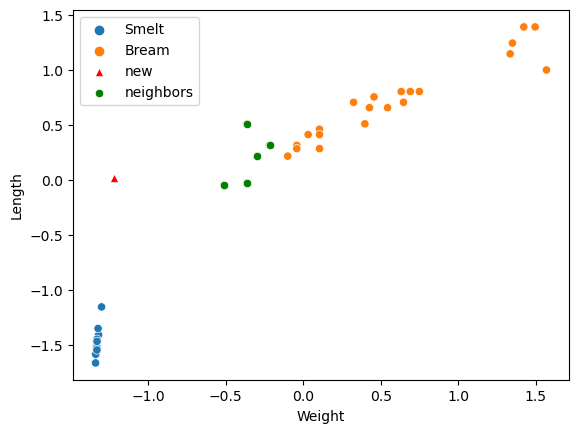

In [48]:
# 시각화로 확인하기
sns.scatterplot(data=train_x_scaled, x='Weight', y='Length',hue=train_y)
sns.scatterplot(data=new_data_scaled, x='Weight', y='Length', marker='^', color='r', label='new')
sns.scatterplot(data=train_x_scaled.iloc[k_index.reshape(-1)], x='Weight', y='Length', color='g', label='neighbors')
plt.show()